<h1 style="color:#2bf0b5;"> <b>Neuroscience</b> HW1-3 - Lachin Naghashyar</h1>

---

<h2 style="color:#f06ff2;"> <b>LIF noisy output model</b></h2>


**Q1:** We use a logistic cdf to model the noisy output. The equation is as follows:

$\rho(t)=f\left(V_{t}-V_{t h}\right)=\beta[1+\tanh (\gamma x)]$

$x=V_{t}-V_{t h}$

1 + tanh is between 0 and 2, but we want this formula to represent a cdf so $beta$ should be $\frac{1}{2}$ in order for the cdf to be between 0 and 1.


In [11]:
import numpy as np
# some constants here:
dt = 0.01  # Simulation time step
Duration = 20  # Simulation length
T = int(np.ceil(Duration / dt))
t = np.arange(1, T + 1) * dt  # Simulation time points in ms

# Q1: calculating rho(t):
V_th = -45
noise_range = 11
V_t = np.linspace(V_th-noise_range, V_th+noise_range, T)
x = V_t - V_th
beta = 1 / 2


def calc_rho(gama):
    return beta * (1 + np.tanh(x * gama))



gama represents the definiteness of $V_{th}$. Meaning for a large gama, the cdf becomes more like a step function and as gama → $\infty$ the threshold becomes sharp and spike firing occurs deterministically at the moment when the membrane potential hits the threshold from below. Also for smaller values of gama, it becomes more non-deterministic. We can see the CDFs for some values of gama below:

<function matplotlib.pyplot.show>

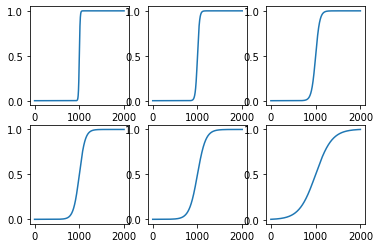

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=3)
ax[0, 0].plot(calc_rho(5))
ax[0, 1].plot(calc_rho(2))
ax[0, 2].plot(calc_rho(1))
ax[1, 0].plot(calc_rho(0.7))
ax[1, 1].plot(calc_rho(0.5))
ax[1, 2].plot(calc_rho(0.25))
plt.show


The corresponding PDF is calculated this way:

In [13]:
# calculate PDF:
def calc_pdf(cdf):
    res = np.zeros(len(cdf))
    res[0] = cdf[0]
    for i in range(1, len(cdf)):
        res[i] = cdf[i] - cdf[i - 1]
    return res / np.sum(res)

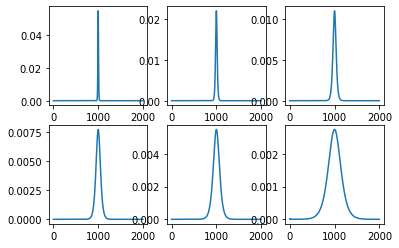

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=3)
ax[0, 0].plot(calc_pdf(calc_rho(5)))
ax[0, 1].plot(calc_pdf(calc_rho(2)))
ax[0, 2].plot(calc_pdf(calc_rho(1)))
ax[1, 0].plot(calc_pdf(calc_rho(0.7))) 
ax[1, 1].plot(calc_pdf(calc_rho(0.5)))
ax[1, 2].plot(calc_pdf(calc_rho(0.25)))
plt.show()

The reason that we use this distribution is that in a more realistic way of looking to neurons activities, 
not all the neurons have the same behaviour as others so this threshold is not a fixed one rather they come from a distribution. 
So here the strict threshold is replaced by a noisy one which depends on the momentary difference between the membrane voltage $V_t$ and the $V_{threshold}$.
So a spike is generated with probability
$\rho(t_{n})=f[V(t_{n})-V_{th}]$ which is a logistic function here.

**Q2:** Similar to the HH model, code below simulates the LIF model using euler method and the cdf calculated in the previous part to create the noisy model. 

In [14]:
V_rest = -70
V = V_rest * np.ones(T)
spike_val = 35

def simulate(RI, V_rest, tau_m):
    pdf = calc_pdf(calc_rho(0.7))
    spike_Vs = [] # voltages that a spike occurred in them 
    for i in range(1, len(t)):
        # dv/dt = 1/tau_m (-v(t) + RI)
        V[i] = V[i - 1] + dt * (1 / tau_m) * (- (V[i - 1] - V_rest) + RI)
        th = np.random.choice(np.linspace(V_th-noise_range, V_th+noise_range, T), p=pdf)
        if V[i] > th:
            spike_Vs.append(V[i])
            V[i] = V_rest
            V[i - 1] = spike_val
    return V, spike_Vs

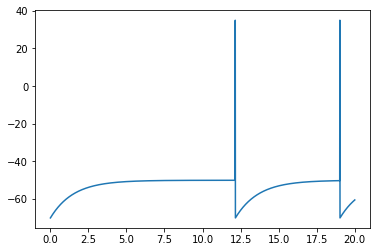

In [17]:
def plot_LIF(RI, V_rest, tau_m):
    V, spike_Vs = simulate(RI, V_rest, tau_m)
    plt.plot(t, V)
    plt.show()


plot_LIF(20, -70, 1.5)

Since the thresholds are picked randomly, we might see one, two or even no spike. But increasing RI will result in more spikes because then dv will increase and so as V[i]. This way we would meet the threshold value more regularly. Below are some plots for different values of RI: 

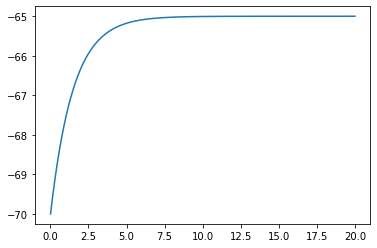

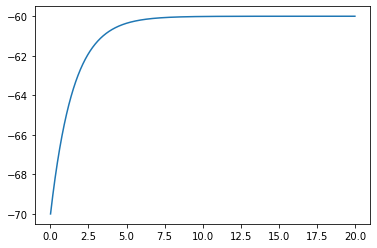

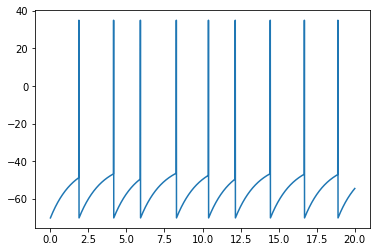

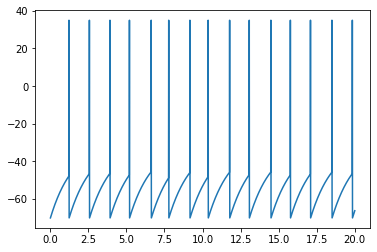

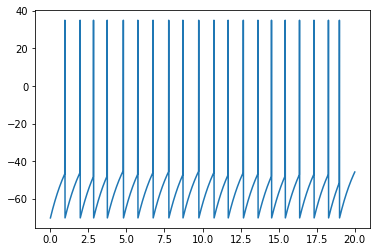

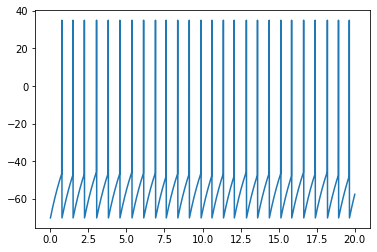

In [20]:
plot_LIF(5, -70, 1.5)
plot_LIF(10, -70, 1.5)
plot_LIF(30, -70, 1.5)
plot_LIF(40, -70, 1.5)
plot_LIF(50, -70, 1.5)
plot_LIF(60, -70, 1.5)

**Q3:** histogram of spikes:

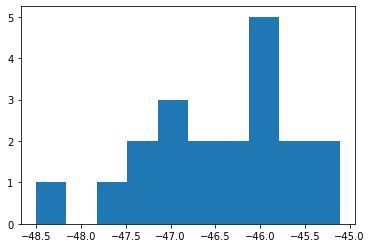

In [24]:
V, spike_Vs = simulate(50, -70, 1.5)
plt.hist(spike_Vs)
plt.show()

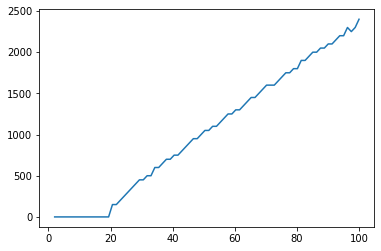

In [26]:
def calc_firing_rate(I, duration):
    V, spike_Vs = simulate(I, -70, 1.5)
    return len(spike_Vs) / (duration / 1000)


I_arr = np.linspace(2, 100, 80)
F = np.zeros(I_arr.shape)
for i in range(80):
    F[i] = calc_firing_rate(I_arr[i], Duration)

plt.plot(I_arr, F)
plt.show()


As expected, when $I$ grows, $RI$ grows as well and so $dv$ will become larger, allowing V[i] to hit the threshold 
faster. This way the number of spikes increases and results in a larger firing rate. As a result, when $I$ grows, 
$F$ grows with it. 